# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

## Import all the necessary libraries

In [46]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [47]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

## Reading the Data into a DataFrame

In [48]:
#To allow reading data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [49]:
#Read the data
path = "/content/drive/MyDrive/Colab Notebooks/abtest.csv"
data = pd.read_csv(path)
df = data.copy()

Execute initial steps to get an overview of the dataset in order to:

- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- If there are any missing values


In [50]:
#view the first few rows of data
df.head()


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [51]:
#check the shape of the data : rows and cols
df.shape

(100, 6)

There are 100 rows and 6 columns

In [52]:
#check the data types of the cols of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


2 nummerical and 4 categorical columns

In [53]:
#check for missing values
df.isna().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


No missing values

In [54]:
#Statistical Summary of the dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


User_id is unique number per user
The mean time spent on the page is ~5.37 almost the same as the median 5.41
There are 3 languages.


### Univariate Analysis

**Time Spent on Page**

Sample mean: 5.38


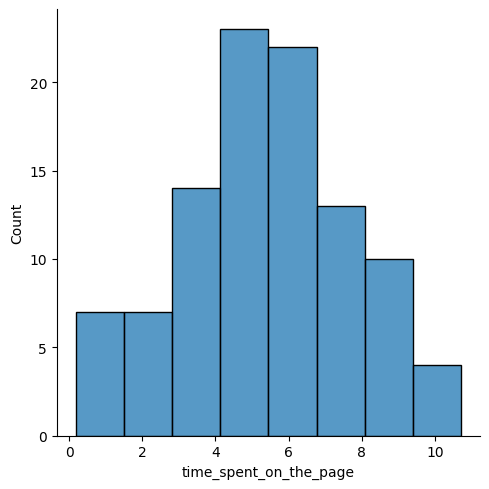

In [55]:
# plot the distribution plot of engagement-time
print('Sample mean:', np.round(df.time_spent_on_the_page.mean(),2))
sns.displot(df.time_spent_on_the_page)
plt.show()

Time spent on page follows follows a fairly normal distribution.

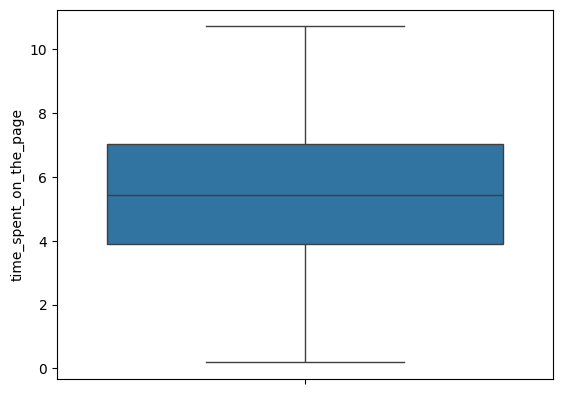

In [56]:
sns.boxplot(df.time_spent_on_the_page)
plt.show()

No outliers and fairly well centered

**Converted**


In [57]:
df.converted.value_counts()

,count
converted,
yes,54
no,46


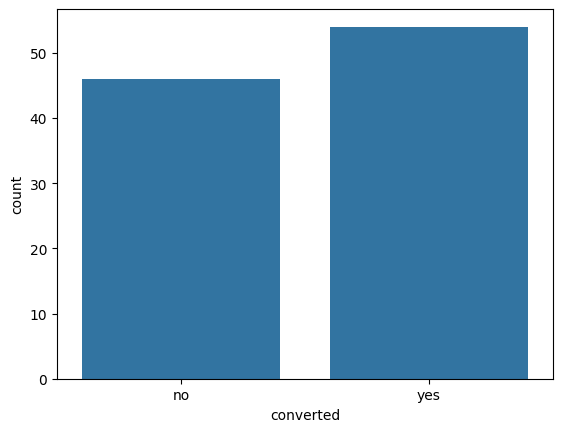

In [58]:
sns.countplot(x='converted', data=df)
plt.show()

Majority of the users converted to the subscribed version.

**Language**

In [59]:
df.language_preferred.value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


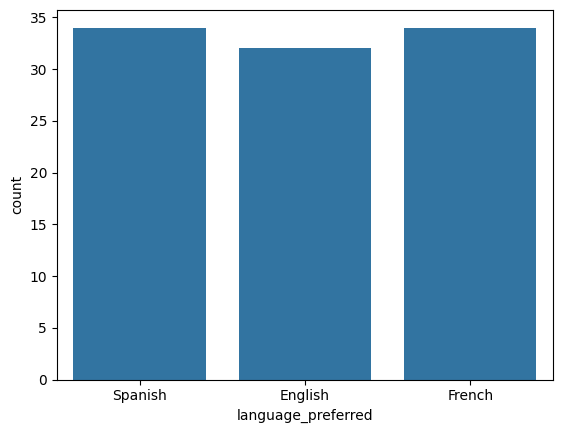

In [60]:
sns.countplot(x='language_preferred', data=df)
plt.show()

The number of users per language is almost the same 32 (English), 34 (Spanish), 34 (French)

**Landing Page**

In [61]:
df.landing_page.value_counts()

,count
landing_page,
old,50
new,50


As expected the landing page is 50 each - this is by design of the experiment

### Bivariate Analysis

**Time spent on the page and Landing Page**

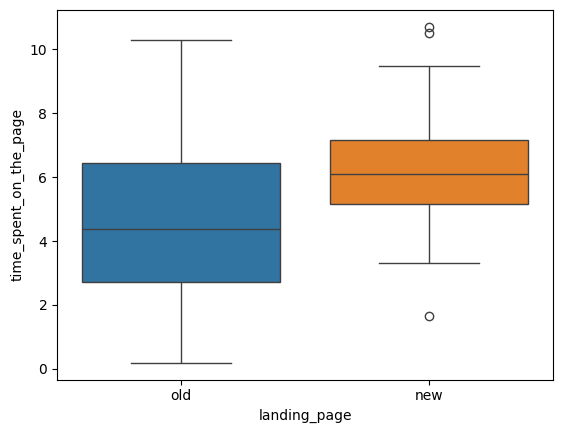

In [62]:
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page', hue='landing_page')
plt.show()

,count,mean,std,min,25%,50%,75%,max
landing_page,,,,,,,,
new,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71
old,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30


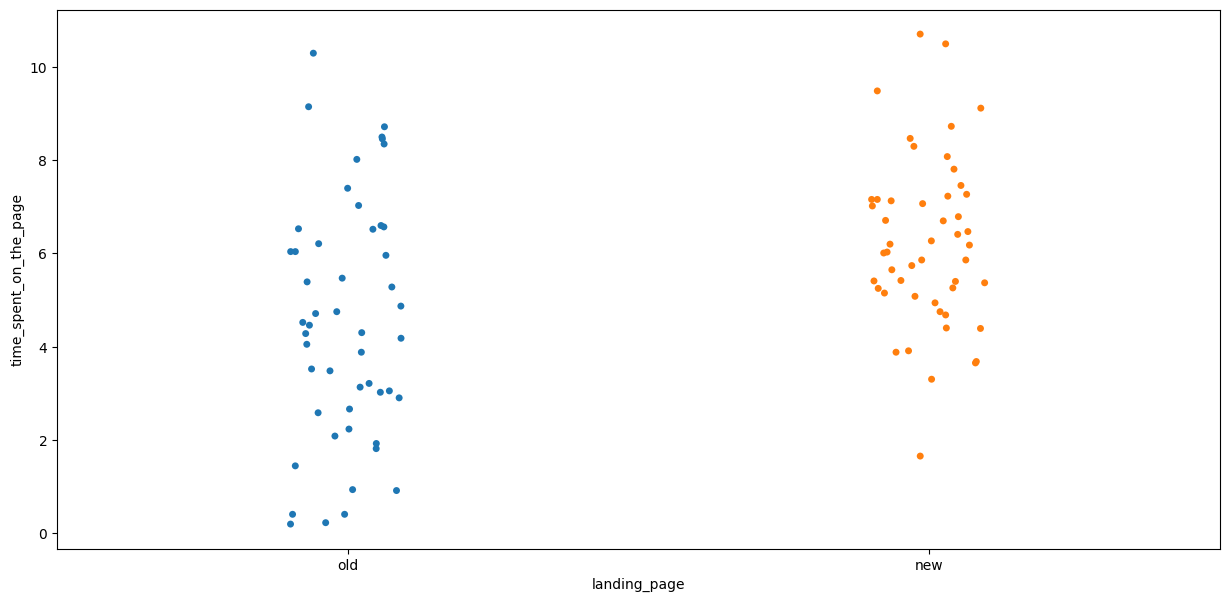

In [63]:
plt.figure(figsize=(15,7))
sns.stripplot(data=df, x='landing_page', y='time_spent_on_the_page', hue='landing_page');
df.groupby('landing_page')['time_spent_on_the_page'].describe()

Both mean and median time spent by users of the new page is larger as compared to the older one. There is also less variability in the usage of the new page indicating consistent high usage of the new page as compare to the old one.

**Time spent on the page and language preferred**

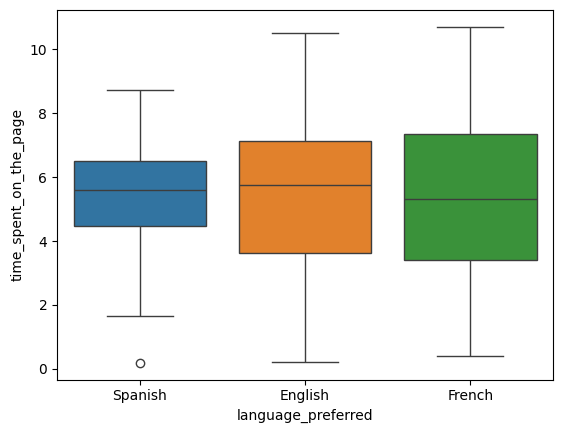

,count,mean,std,min,25%,50%,75%,max
language_preferred,,,,,,,,
English,32.0,5.559062,2.621079,0.22,3.6175,5.755,7.1375,10.50
French,34.0,5.253235,2.675413,0.40,3.3950,5.315,7.3675,10.71
Spanish,34.0,5.331765,1.818095,0.19,4.4750,5.605,6.5150,8.72


In [64]:
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page', hue='language_preferred')
plt.show()
df.groupby('language_preferred')['time_spent_on_the_page'].describe()

Spanish users show the lowest variability , while French have the lowest median

**Time spent on landing page and converted**

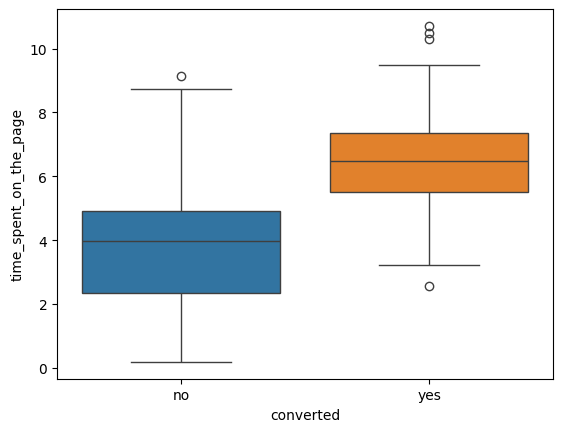

,count,mean,std,min,25%,50%,75%,max
converted,,,,,,,,
no,46.0,3.915870,2.226897,0.19,2.3375,3.980,4.9225,9.15
yes,54.0,6.623148,1.708427,2.58,5.5000,6.495,7.3675,10.71


In [65]:
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page', hue='converted')
plt.show()
df.groupby('converted')['time_spent_on_the_page'].describe()

Overall : The mean time spent by users that converted is ~60% than the non-converted. Lets check if this is statistically significant

Use a H0 (null Hypothesis) : Mean time spent by users that converted <= mean time spent by users that did not convert
H1 (alternate Hypothesis) : mean time spent by users that converted > mean time spent by users that did not convert

- Samples are random : given
- Sample size > 30

Assume a significance level of alpha = 0.05



In [66]:
import scipy.stats as stats

time_spent_converted = df[df['converted'] == 'yes']['time_spent_on_the_page']
time_spent_not_converted = df[df['converted'] == 'no']['time_spent_on_the_page']
t_stat, p_value = stats.ttest_ind(time_spent_converted , time_spent_not_converted, equal_var=False, alternative='greater')
print("t_stat = ", t_stat, "p_value = ",p_value)

t_stat =  6.729273046751029 p_value =  9.973925080514638e-10


We see that the p-value is less than alpha , hence we reject the null hypothesis. We can infer that mean time spent on a landing page by users that converted is larger than those that did not convert

**converted and new page**

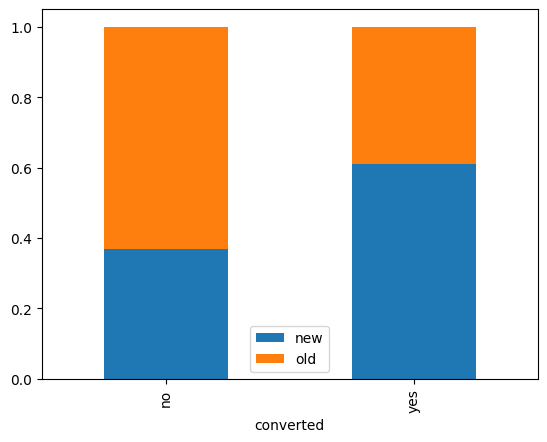

converted,no,yes,All
landing_page,,,
new,17,33,50
old,29,21,50
All,46,54,100


In [67]:
#sns.countplot(x='converted', hue='landing_page', data=df)
#plt.show()
pd.crosstab(df['converted'],df['landing_page'],normalize='index').plot(kind='bar',stacked =True)
plt.legend()
plt.show()
pd.crosstab(df.landing_page,df.converted,margins=True)

From the graph it seems that majority of the users who saw the new page converted to the subscribed version; whereas majority of the users who saw the old page did not convert.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

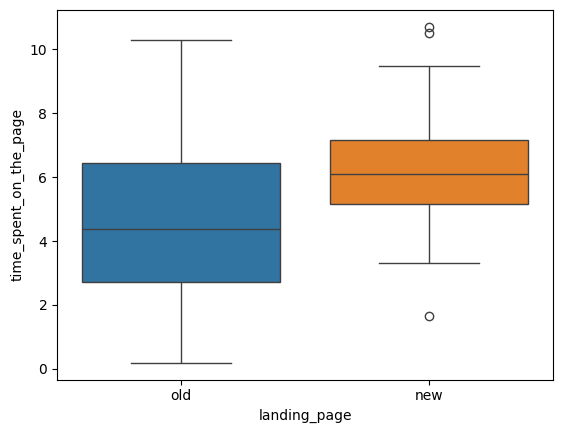

,count,mean,std,min,25%,50%,75%,max
landing_page,,,,,,,,
new,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71
old,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30


In [68]:
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page', hue='landing_page')
plt.show()
df.groupby('landing_page')['time_spent_on_the_page'].describe()

Users on average spend more time (~37%) on the new page compared to the old one

### Step 1: Define the null and alternate hypotheses

H0 : mean time spent on old landing page (mu0) <= mean time spent on new landing page (mu)
H1 : mean time spent on new landing page (mu1) > mean time spent on old landing page (mu0)

### Step 2: Select Appropriate test

Since this the alternate hypothesis is testing one tail (>), for 2 independent populations (samples) we will use a two sample , one tailed t_test

### Step 3: Decide the significance level

We will use a significance level of alpha (α) = 0.05

In [69]:
alpha = 0.05

### Step 4: Collect and prepare data

In [70]:
time_spent_new_pg = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_old_pg = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [71]:
#check if std deviations are the same
print("std deviation of time spent on new page = ",np.std(time_spent_new_pg))
print("std deviation of time spent on old page = ",np.std(time_spent_old_pg))

std deviation of time spent on new page =  1.7987689568146321
std deviation of time spent on old page =  2.556024694716387


Std deviation is not the same so we will use equal_var = False

### Step 5: Calculate the p-value

In [72]:
import scipy.stats as stats
t_stat, p_value = stats.ttest_ind(time_spent_new_pg, time_spent_old_pg, equal_var=False, alternative='greater')
print("t_stat = ", t_stat, "p_value = ",p_value)

t_stat =  3.7867702694199856 p_value =  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [73]:
if p_value < alpha :
  print("Since p_value is less than alpha; we reject the null hypothesis ")
else:
  print("since p_value is >= alpha we fail to reject the null hypothesis")

Since p_value is less than alpha; we reject the null hypothesis 


### Step 7:  Draw inference

We reject the null hypothesis that the mean time spent on the new page is less than or equal to the mean time spent on the old page. Hence we infer that the mean time spent on the new page is more.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Since 'converted' and 'landing page' are categorical features, we will use cross tab to analyse these

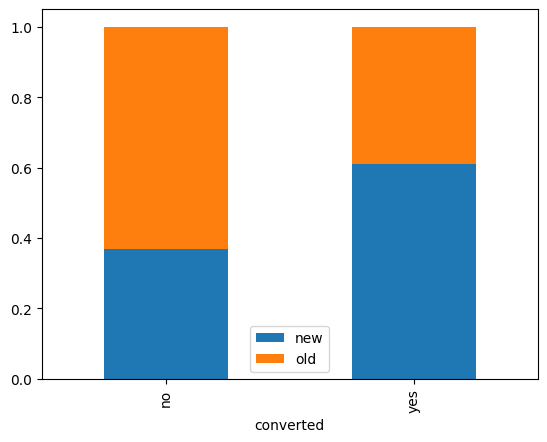

converted,no,yes,All
landing_page,,,
new,17,33,50
old,29,21,50
All,46,54,100


In [74]:
pd.crosstab(df['converted'],df['landing_page'],normalize='index').plot(kind='bar',stacked =True)
plt.legend()
plt.show()
pd.crosstab(df.landing_page,df.converted,margins=True)

Since we want to compare the proportion of users of old landing page that converted to the proportion of users of new landing page that converted. We will compute the proportions and specify the following Hypothesis:

H0 (null hypothesis): proportion of users of old landing page that converted <= proportion of users of new landing page that converted
Ha (alternate hypothesis) : proportion of users of new page that converted > proportion of users of old landing page that converted

Here we have 2 independent samples so we Use a 2 sample , one tailed (since we are measuring only 'greater than' in the alternate hypothesis)

We will use z -proportion test with a significance of alpha = 0.05.

We will now check if all the requirements for this test are met:
1. Binomial distributed : converted or not is binomial
2. These are from 2 independent populations
3. Both populations are greater than 10 as seen above (50 each). Hence CLT will apply .

In [75]:
newpg_converted = df[df['landing_page']=='new']['converted'].value_counts()['yes']
oldpg_converted = df[df['landing_page']=='old']['converted'].value_counts()['yes']

newpg_allusers = df[df['landing_page']=='new'].shape[0]
oldpg_allusers = df[df['landing_page']=='old'].shape[0]

print(f'new landing page converted users= {newpg_converted}, old page converted users = {oldpg_converted}, users of new page = {newpg_allusers}, users of old page={oldpg_allusers}')

new landing page converted users= 33, old page converted users = 21, users of new page = 50, users of old page=50


In [76]:
from statsmodels.stats.proportion import proportions_ztest
converted_users = np.array([newpg_converted,oldpg_converted])
total_users = np.array([newpg_allusers,oldpg_allusers ])

test_stat, p_value = proportions_ztest(converted_users, total_users, alternative='larger')
print(f'test_stat={test_stat} , p_value= {p_value}')

test_stat=2.4077170617153842 , p_value= 0.008026308204056278


In [77]:
alpha = 0.05
if p_value < alpha :
  print("Since p_value is less than alpha; we reject the null hypothesis ")
else:
  print("since p_value is >= alpha we fail to reject the null hypothesis")

Since p_value is less than alpha; we reject the null hypothesis 


We reject the null hypothesis that proportion of converted users on the new page is less than or same as the proportion of converted users on the old page . Hence we infer that proportion of users of the new page that convert is higher

## 3. Is the conversion and preferred language are independent or related?

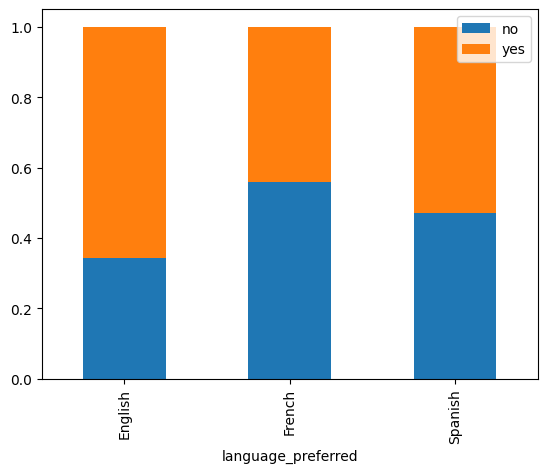

converted           no  yes  All
language_preferred              
English             11   21   32
French              19   15   34
Spanish             16   18   34
All                 46   54  100


In [78]:
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind='bar',stacked =True)
plt.legend()
plt.show()
contingency_table = pd.crosstab(df.language_preferred,df.converted,margins=True)
print(contingency_table)

We are trying to see if conversion in independent of language or not.
So H0 (null Hypothesis) = converted and language_preferred are independent
H1 (alternate Hypothesis) = converted and language_preferred are not independent

We will use the chi-square test for independence as all the requirements for that are met:
- This is a test among categorical variables
- The sample size is > 5 (> 30 in all cases)
- Random samples ( part of the problem statement)

We will assume a significance level of alpha = 0.05

In [79]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected_freq = chi2_contingency(contingency_table)
print(p_value)

0.7970832186581234


In [80]:
alpha = 0.05
if p_value < alpha :
  print(f"Since p_value is{p_value} less than alpha; we reject the null hypothesis ")
else:
  print(f"since p_value is {p_value} >= alpha we fail to reject the null hypothesis")

since p_value is 0.7970832186581234 >= alpha we fail to reject the null hypothesis


Inference:
Since the p-value is larger than alpha we fail to reject the null Hypothesis and hence we infer that conversion is independent of the language_preferred

## 4. Is the time spent on the new page same for the different language users?

In [81]:
new_page_usage = df[df['landing_page']=='new']

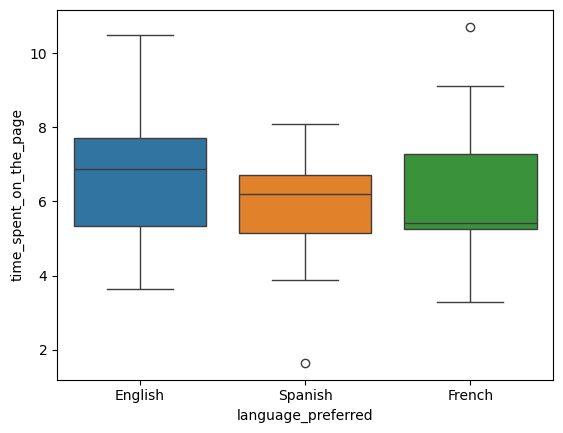

,count,mean,std,min,25%,50%,75%,max
language_preferred,,,,,,,,
English,16.0,6.663750,1.984150,3.65,5.3275,6.865,7.7125,10.50
French,17.0,6.196471,1.933394,3.30,5.2500,5.420,7.2700,10.71
Spanish,17.0,5.835294,1.525656,1.65,5.1500,6.200,6.7000,8.08


In [82]:
sns.boxplot(data=new_page_usage,x='language_preferred',y='time_spent_on_the_page', hue='language_preferred')
plt.show()
new_page_usage.groupby('language_preferred')['time_spent_on_the_page'].describe()

The means vary but we dont know if the variation is statistically significant.
To determine this we can use the ANOVA test to compare the means.

The conditions for using the ANOVA test are:
- Samples are independent random samples - this is given
- Group populations are normally distributed  - we will check this using the Shapiro-Wilk's test:
We will test the null hypothesis

H0:  time_spent_on_the_page for new pages follows a normal distribution against

against the alternative hypothesis

Ha:  time_spent_on_the_page for new pages does not follow a normal distribution

- Group population have a common variance - we will check this using the Levene's test



In [83]:
# Shapiro-Wilk's test
from scipy import stats

w, p_value = stats.shapiro(new_page_usage['time_spent_on_the_page'])
print(p_value)

0.8040040364746845


Since p_value for Shapiro-Wilk's test is greater than 0.05 , we fail to reject the null hypothesis - hence we assume that time_spent_on_the_page follows a normal distribution

We will now use Levene's test for the third condition of equality of population variances:
H0 : all the population variances are equal
Ha: at least one variance is different from the rest

In [84]:
from scipy.stats import levene

statistic, p_value = levene(new_page_usage['time_spent_on_the_page'][new_page_usage['language_preferred']=='English'],
                             new_page_usage['time_spent_on_the_page'][new_page_usage['language_preferred']=='Spanish'],
                             new_page_usage['time_spent_on_the_page'][new_page_usage['language_preferred']=='French'])
print('The p_value is ', p_value)

The p_value is  0.46711357711340173


Since p_value for Levene's test is greater than 0.05 , we fail to reject the null hypothesis - hence we assume the homogenity of variances

Since all the conditions of the ANOVA test are met we now formulate the hypothesis:

H0 (null hypothesis)  = the mean time spent on the new page by english users = mean time spent on the new page by spanish users = mean time spent on the new page by french users

H1 (alternate hypotheis) = at least one of the means is different from the rest

We will use a significance leve of alpha = 0.05


In [85]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(new_page_usage.loc[new_page_usage['language_preferred'] == 'English','time_spent_on_the_page'],\
                              new_page_usage.loc[new_page_usage['language_preferred'] == 'French','time_spent_on_the_page'],\
                              new_page_usage.loc[new_page_usage['language_preferred'] == 'Spanish','time_spent_on_the_page'])
print('The p_value is ', p_value)


The p_value is  0.43204138694325955


In [86]:
alpha = 0.05
if p_value < alpha :
  print(f"Since p_value is{p_value} less than alpha; we reject the null hypothesis ")
else:
  print(f"since p_value is {p_value} >= alpha we fail to reject the null hypothesis")

since p_value is 0.43204138694325955 >= alpha we fail to reject the null hypothesis


Since the p_value is greater than alpha we fail to reject the null hypothesis and conclude that the means are equal. Hence average time spent on the new page by users of different languages are equal

## Conclusion and Business Recommendations

From the data provided, it can inferred that:
1. Mean time spent by users on the new psge is greater (data shows 37% more) than the mean time spent by users on the old page. This indicates better engagement by users on the new page.

2. We also confirmed that the mean time spent on any page by users that converted is higher than users that did not convert. This indicates higher engagement may possibly lead to conversion

3  We also validated that the proportion of new page users that converted was greater than the proportion of old page users that converted.

4. Language preferrences did not impact conversion or time spent on the page

Given the above insights we can conclude that the new page is more effective in engaging users and increasing the conversion rate. Hence we can recommend that the new page replace the old one.
